# 06/11/21: Challenge 2 Help

In [220]:
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
%matplotlib inline
import xarray as xr
import geopandas as gp
from scipy import signal
import pandas as pd

In [241]:
# drift = xr.open_dataset("/Users/samo2402/dple_bootcamp/DPLE.pH.drift.Bootcamp.nc")
# drift = drift.clim

data = xr.open_dataset("/Users/samo2402/dple_bootcamp/DPLE.pH.Bootcamp.1991.nc")
data = data.anom

grid = xr.open_dataset('new_grid.nc')

In [222]:
# dple = data.sel(S=1990.)

data['L'] = pd.date_range("1990-11", freq="MS",periods=60)

data = data.rename({'L': 'time','M': 'member'})

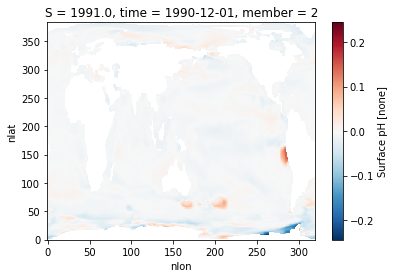

In [223]:
data.isel(time=1,member=1).plot()

In [224]:
# subset data to smaller region!
data = data.sel(nlat = slice(200,335), nlon = slice(200,248))

sub_grid = grid.sel(nlat = slice(200,335), nlon = slice(200,248))

In [225]:
data = (data * sub_grid.TAREA) / sub_grid.TAREA.mean()

In [226]:
# find ensemble mean
ens_mean = data.mean(dim='member')

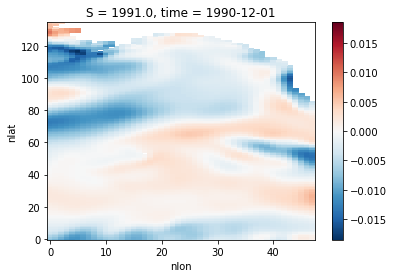

In [227]:
ens_mean.isel(time=1).plot()

In [228]:
print(type(ens_mean))

<class 'xarray.core.dataarray.DataArray'>


Text(0.5, 1.0, 'DPLE pH Anonaly (11/91 Initialization)')

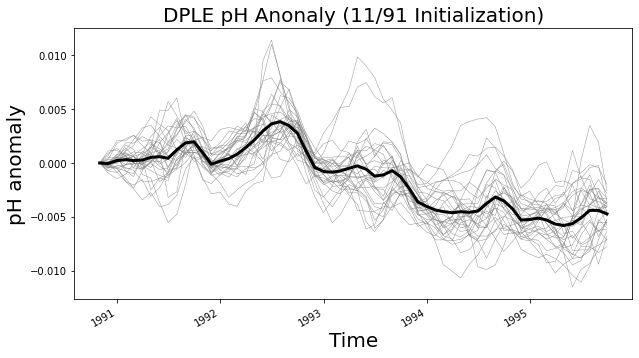

In [229]:
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

tmp = data.mean(dim=('S','nlat','nlon'))
for i in range(1,31):
    (tmp.sel(member=i) - tmp.sel(member=i).isel(time=0).mean()).plot(color='grey',linewidth = 0.4)
    
dple = ens_mean.mean(dim=('S','nlat','nlon'))
(dple-dple.isel(time=0).mean()).plot.line(color='black',linewidth=3,label='dple')

ax.set_ylabel('pH anomaly',fontsize=20)
ax.set_xlabel('Time',fontsize=20)
ax.set_title('DPLE pH Anonaly (11/91 Initialization)',fontsize=20)

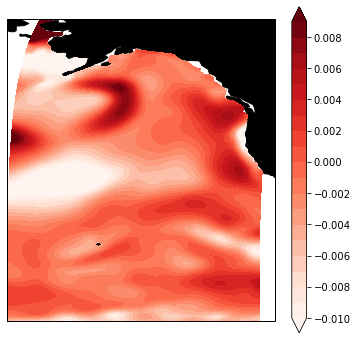

In [240]:
f, ax = plt.subplots(nrows=1,ncols=1,figsize=(6,6),subplot_kw=dict(projection=ccrs.PlateCarree(central_longitude=180)))
ax.add_feature(cfeature.LAND,color='k')

im = ax.contourf(grid_sub.TLONG,grid_sub.TLAT,ens_mean.mean(dim=('S')).isel(time=0),
                 transform=ccrs.PlateCarree(), 
                 cmap = 'Reds', levels=np.arange(-0.01,0.01,0.001),extend='both')

f.colorbar(im)